In [49]:
#load libraries 
import time,os
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np,cupy as cp, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas

#from toggle_cell import hide_cell 
import uproot3
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)

from scipy.optimize import curve_fit

import misc_util

NameError: name 'tf' is not defined

In [ ]:
data_dihadrons = uproot3.open('../in/data_dihadrons_30pc.root')['dihadrons'].pandas.df()

In [17]:
data_triggers = pd.read_pickle('../in/data_hadrons_trigger_30pc.pkl')

In [3]:
len(data_dihadrons)

1672821

In [75]:
df = data_dihadrons

start = time.perf_counter()
#try:
N = len(df)

z2 = df['h2_z']
pid2 = df['h2_pid']
def same_bin(i,ii):
    if pid2[i] != pid2[i]:
        return False
    z2i = z2[i]
    z2ii = z2[ii]
    if (z2i<0.12 and z2ii<0.12):
        return True
    elif (z2i<0.25 and z2ii<0.25 and z2i>0.12 and z2ii>0.12):
        return True
    elif (z2i>0.25 and z2ii>0.25):
        return True
    else :
        return False

mixdphi = [0]*N
mixdeta = [0]*N
mixdrap = [0]*N
mixpt = [0]*N
mixz2 = [0]*N
found_mix = [0]*N
ii = 0
for i in range(N):
    
    for ii in range(max(0, i-12), max(i-2,0)):
        if same_bin(i,ii):
            found_mix[i] = 1
            break
    mixdphi[i] = df['h1_cm_ph'][i]-df['h2_cm_ph'][ii]
    mixdrap[i] = df['h1_cm_rap'][i]-df['h2_cm_rap'][ii]
    mixdeta[i] = df['h1_cm_eta'][i]-df['h2_cm_eta'][ii]
    mixpt[i] = df['h2_cm_pt'][ii]
    mixz2[i] = df['h2_z'][ii]
    if i % 10000 == 0:
        duration = time.perf_counter()-start
        print(i/N*100,"% complete, time so far: ",duration//3600,"hours", (duration//60)%60, "minutes", int(duration % 60), "seconds")
df['mix_diff_phi'] = mixdphi

df['mix_diff_eta'] = mixdphi
df['mix_diff_rap'] = mixdrap
df['mix_h2_pt'] = mixpt
df['mix_h2_z'] = mixz2
df['mix_found'] = found_mix

duration = time.perf_counter()-start
print("total time: ",duration//3600,"hours", (duration//60)%60, "minutes", int(duration % 60), "seconds")
os.system('say "your program has finished"')

0.0 % complete, time so far:  0.0 hours 0.0 minutes 0 seconds
0.5977925910781847 % complete, time so far:  0.0 hours 0.0 minutes 2 seconds
1.1955851821563694 % complete, time so far:  0.0 hours 0.0 minutes 4 seconds
1.793377773234554 % complete, time so far:  0.0 hours 0.0 minutes 7 seconds
2.391170364312739 % complete, time so far:  0.0 hours 0.0 minutes 9 seconds
2.9889629553909236 % complete, time so far:  0.0 hours 0.0 minutes 11 seconds
3.586755546469108 % complete, time so far:  0.0 hours 0.0 minutes 14 seconds
4.184548137547293 % complete, time so far:  0.0 hours 0.0 minutes 16 seconds
4.782340728625478 % complete, time so far:  0.0 hours 0.0 minutes 18 seconds
5.3801333197036625 % complete, time so far:  0.0 hours 0.0 minutes 20 seconds
5.977925910781847 % complete, time so far:  0.0 hours 0.0 minutes 23 seconds
6.575718501860031 % complete, time so far:  0.0 hours 0.0 minutes 25 seconds
7.173511092938216 % complete, time so far:  0.0 hours 0.0 minutes 27 seconds
7.771303684016

63.963807245365764 % complete, time so far:  0.0 hours 4.0 minutes 9 seconds
64.56159983644395 % complete, time so far:  0.0 hours 4.0 minutes 12 seconds
65.15939242752214 % complete, time so far:  0.0 hours 4.0 minutes 14 seconds
65.75718501860031 % complete, time so far:  0.0 hours 4.0 minutes 16 seconds
66.3549776096785 % complete, time so far:  0.0 hours 4.0 minutes 19 seconds
66.95277020075669 % complete, time so far:  0.0 hours 4.0 minutes 21 seconds
67.55056279183486 % complete, time so far:  0.0 hours 4.0 minutes 23 seconds
68.14835538291305 % complete, time so far:  0.0 hours 4.0 minutes 26 seconds
68.74614797399124 % complete, time so far:  0.0 hours 4.0 minutes 28 seconds
69.34394056506943 % complete, time so far:  0.0 hours 4.0 minutes 31 seconds
69.9417331561476 % complete, time so far:  0.0 hours 4.0 minutes 33 seconds
70.5395257472258 % complete, time so far:  0.0 hours 4.0 minutes 35 seconds
71.13731833830398 % complete, time so far:  0.0 hours 4.0 minutes 38 seconds
71

32512

In [57]:
df = data_dihadrons
df['mix_diff_phi_shift'] = df['mix_diff_phi']+2*np.pi*(df['mix_diff_phi']<-np.pi/2)
df['mix_diff_phi_shift'] = df['mix_diff_phi_shift']-2*np.pi*(df['mix_diff_phi_shift']>3*np.pi/2)
df['mix_diff_phi_shift'] = df['mix_diff_phi_shift']-2*np.pi*(df['mix_diff_phi_shift']>3*np.pi/2)
df['mix_diff_phi_shift'] = df['mix_diff_phi_shift']+2*np.pi*(df['mix_diff_phi_shift']<-np.pi/2)

df['diff_phi_shift'] = df['diff_phi_cm']+2*np.pi*(df['diff_phi_cm']<-np.pi/2)

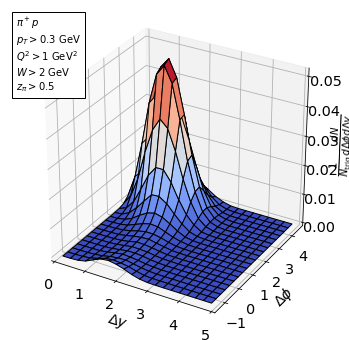

In [39]:

def dphi_deta_plot(df,df_trig,deta_range=(-2,6),bins=20,fig=None):
    dphi_range = (-np.pi/2,3*np.pi/2)
    x = df.diff_rap_cm
    y = df.diff_phi_shift
    if fig == None:
        fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')
    hist, xedges, yedges = np.histogram2d(x, y, bins=bins, range=[deta_range, dphi_range])
    
    denom = len(df_trig)*2*np.pi/bins*(deta_range[1]-deta_range[0])/bins
    hist = np.divide(hist, denom)
    xpos, ypos = np.meshgrid(np.add(xedges[:-1],xedges[1:])/2, np.add(yedges[:-1],yedges[1:])/2)
    zpos = 0

    surf = ax.plot_surface(xpos, ypos, hist.transpose(), cmap=cm.coolwarm,edgecolor='k')
    ax.set_xlabel("$\\Delta y$")
    ax.set_ylabel("$\\Delta\\phi$")
    ax.set_zlabel("$\\frac{1}{N_{\\mathrm{trig}}}\\frac{dN}{d\\Delta\\phi d\\Delta y}$",rotation=-90)
    ax.set_xlim(*deta_range)
    ax.set_ylim(*dphi_range)
    return fig,ax
df = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + "and h2_pid == 2212")
df_trig = data_triggers.query("h_cm_pt>0.3")
fig,ax = dphi_deta_plot(df,df_trig,
              deta_range=(0,5))
plt.gca().add_artist(AnchoredText("$\pi^+p$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_\\pi>0.5$",loc='upper left'))
plt.savefig("../images/dphi_vs_deta_pip_p.pdf",bbox_inches='tight')
plt.show()

In [73]:
def dphi_deta_plot_3(df,df_trig,deta_range=(-2,3),bins=20,fig=None):
    dphi_range = (-np.pi/2,3*np.pi/2)
    if fig == None:
        fig = plt.figure(figsize=(18,6))
    ax1 = fig.add_subplot(131, projection='3d')
    
    denom = len(df_trig)*2*np.pi/bins*(deta_range[1]-deta_range[0])/bins
    hist1, xedges, yedges = np.histogram2d(df.diff_rap_cm, df.diff_phi_shift, bins=bins, range=[deta_range, dphi_range])
    hist1 = np.divide(hist1, denom)
    print(xedges)
    dfq = df.query("mix_found == 1")
    hist2, xedges, yedges = np.histogram2d(dfq.mix_diff_rap, dfq.mix_diff_phi, bins=bins, range=[deta_range, dphi_range])
    hist2 = np.divide(hist2,denom)
    
    hist3 = np.divide(hist1,hist2)
    
    xpos, ypos = np.meshgrid(np.add(xedges[:-1],xedges[1:])/2, np.add(yedges[:-1],yedges[1:])/2)
    zpos = 0

    surf = ax1.plot_surface(xpos, ypos, hist1.transpose(), cmap=cm.coolwarm,edgecolor='k')
    ax1.set_xlabel("$\\Delta y$")
    ax1.set_ylabel("$\\Delta\\phi$")
    ax1.zaxis.set_rotate_label(False)
    ax1.set_title("$\\frac{1}{N_{\\mathrm{trig}}}\\frac{dN}{d\\Delta\\phi d\\Delta y}$",rotation=0)
    ax1.set_xlim(*deta_range)
    ax1.set_ylim(*dphi_range)
    
    
    ax2 = fig.add_subplot(132, projection='3d')
    surf = ax2.plot_surface(xpos, ypos, hist2.transpose(), cmap=cm.coolwarm,edgecolor='k')
    ax2.set_xlabel("$\\Delta y$")
    ax2.set_ylabel("$\\Delta\\phi$")
    ax2.zaxis.set_rotate_label(False)
    ax2.set_title("$\\frac{1}{N_{\\mathrm{trig}}}\\frac{dN}{d\\Delta\\phi d\\Delta y}$ mix",rotation=0)
    ax2.set_xlim(*deta_range)
    ax2.set_ylim(*dphi_range)
    
    
    
    ax3 = fig.add_subplot(133, projection='3d')
    surf = ax3.plot_surface(xpos, ypos, hist3.transpose(), cmap=cm.coolwarm,edgecolor='k')
    ax3.set_xlabel("$\\Delta y$")
    ax3.set_ylabel("$\\Delta\\phi$")
    ax3.zaxis.set_rotate_label(False)
    ax3.set_title("$C(\\Delta\\phi,\\Delta y)$",rotation=0)
    ax3.set_xlim(*deta_range)
    ax3.set_ylim(*dphi_range)
    
    
    return fig,[ax1,ax2,ax3]

[-1.    -0.805 -0.61  -0.415 -0.22  -0.025  0.17   0.365  0.56   0.755
  0.95   1.145  1.34   1.535  1.73   1.925  2.12   2.315  2.51   2.705
  2.9  ]


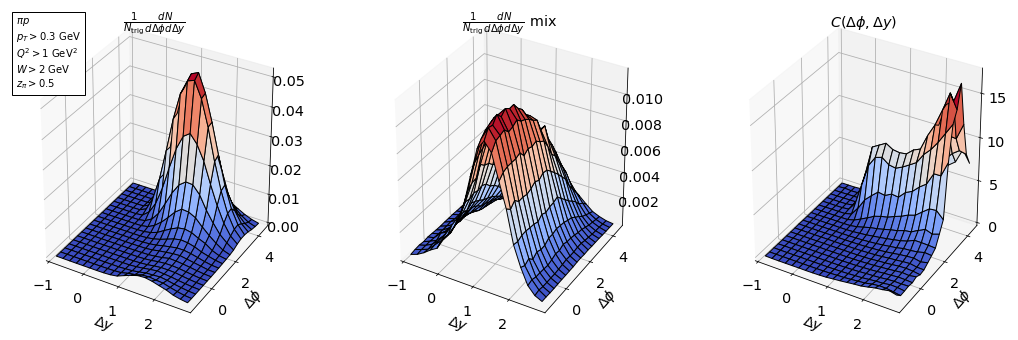

[-1.    -0.805 -0.61  -0.415 -0.22  -0.025  0.17   0.365  0.56   0.755
  0.95   1.145  1.34   1.535  1.73   1.925  2.12   2.315  2.51   2.705
  2.9  ]


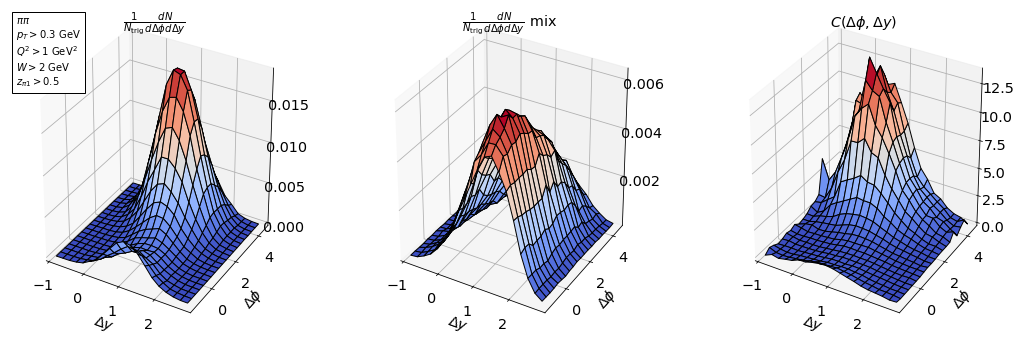

In [74]:
df = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + "and h2_pid == 2212")
df_trig = data_triggers.query("h_cm_pt>0.3")
fig,axs = dphi_deta_plot_3(df,df_trig,
              deta_range=(-1,2.9))
axs[0].add_artist(AnchoredText("$\pi p$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_\\pi>0.5$",loc='upper left'))
plt.savefig("../images/dphi_vs_deta_pi_p.pdf",bbox_inches='tight')
plt.show()

df = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + "and abs(h2_pid) == 211")
df_trig = data_triggers.query("h_cm_pt>0.3")
fig,axs = dphi_deta_plot_3(df,df_trig,
              deta_range=(-1,2.9))
axs[0].add_artist(AnchoredText("$\pi\pi$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_{\\pi1}>0.5$",loc='upper left'))
plt.savefig("../images/dphi_vs_deta_pi_p.pdf",bbox_inches='tight')
plt.show()

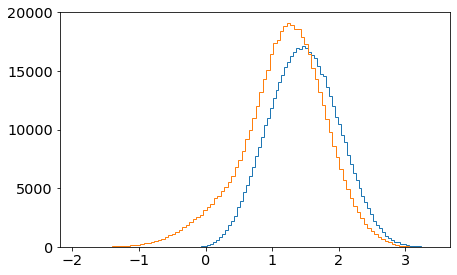

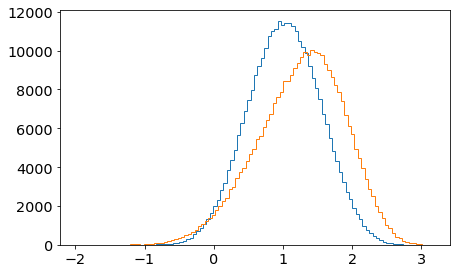

In [79]:
df = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + "and h2_pid == 2212")
plt.hist(df.diff_rap_cm,bins=100,histtype='step')
plt.hist(df.mix_diff_rap,bins=100,histtype='step')
plt.show()
df = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + "and abs(h2_pid) == 211")
plt.hist(df.diff_rap_cm,bins=100,histtype='step')
plt.hist(df.mix_diff_rap,bins=100,histtype='step')
plt.show()

In [107]:
import misc_util

def azimuthalPlot(df,df_trig,n=4,bins = 50, includeResiduals=False,includeLegend=True,style='normal',
                 normalize_properly=True,show='corr'):
    if(includeResiduals):
        fig,axs = plt.subplots(2,1, figsize=(7,7), gridspec_kw={'height_ratios': [3, 1]}, 
                              sharex='all')
        plt.sca(axs[0])
    x,y,dy = [],[],[]
    
    denom = len(df_trig)*2*np.pi/bins
    y, x = np.histogram(df.diff_phi_shift, bins=bins, range=(-np.pi/2,3*np.pi/2))
    x = np.add(x[1:],x[:-1])/2
    
    dy = np.sqrt(y)
    ym, _ = np.histogram(df.mix_diff_phi_shift, bins=bins, range=(-np.pi/2,3*np.pi/2))
    dym = np.sqrt(ym)
    
    y=np.divide(y,denom)
    ym=np.divide(ym,denom)
    dy=np.divide(dy,denom)
    dym=np.divide(dym,denom)
    if show == 'corr':
        dy = y/ym*np.hypot(dy/y, dym/ym)
        y= y/ym
    elif show == 'mix':
        y=ym
        dy = dym
    
    
    if style== 'normal':
        plt.errorbar(x,y,dy,marker='o',color='k',linestyle='')
        plt.axhline(0,color='0.7',linestyle=':')
        #a = [2*sum(y*np.sin(i*x))/len(x) for i in range(0,n+1)]
        #remove sin term
        #a = [0 for i in range(0,n+1)]
        b = [2*sum(y*np.cos(i*x))/len(x) for i in range(0,n+1)]
        b[0]/=2
        s = 0
        for i in range(0,n+1):
            s = b[i]*np.cos(i*x)+s
        plt.plot(x,s,linestyle='-',color='k',label='all')
        for i in range(1,n+1):
            plt.plot(x,b[i]*np.cos(i*x)+b[0]*(i!=0),linestyle='--', label="n=%s"%i)
        plt.gca().set_xlim(-np.pi/2,np.pi*3/2)
        if show == 'same':
            plt.gca().set_ylabel("$\\frac{1}{N_{\\mathrm{trig}}}\\frac{dN}{d\\Delta\\phi}$",rotation=0,fontsize=20,labelpad=25)
        elif show == 'corr' :
            plt.gca().set_ylabel("$C(\\Delta\\phi)$",rotation=0,fontsize=20,labelpad=25)
        elif show == 'mix' :
            plt.gca().set_ylabel("$\\frac{1}{N_{\\mathrm{trig}}}\\frac{dN^{\\mathrm{mix}}}{d\\Delta\\phi}$",rotation=0,fontsize=20,labelpad=25)
                
    elif style=='bar':
        plt.gca().bar(x,y,x[1]-x[0],alpha=0.3,color='tab:pink')
    if not includeResiduals:
        plt.gca().set_xlabel("$\\Delta\\phi$ [rad]")
    if includeLegend:
        legend = plt.gca().legend(title="Fourier fit",loc='upper left')
        plt.setp(legend.get_title(),fontsize=12)
    if includeResiduals:
        plt.sca(axs[1])
        plt.errorbar(x,(y-s)/dy,1,marker='o',color='k',linestyle='')
        plt.gca().set_xlabel("$\\Delta\\phi$ [rad]")
        axs[1].set_ylabel('normed residual')
        #lims = axs[0].get_ylim()
        #axs[1].set_ylim(-(lims[1]-lims[0])/6,(lims[1]-lims[0])/6)
        plt.sca(axs[0])
        plt.subplots_adjust(hspace=0)

In [118]:
def azimuthalPlot_3(df,df_trig,n=4,bins = 50, includeResiduals=False,includeLegend=True,style='normal',
                 normalize_properly=True):
    fig,axs = plt.subplots(1,3, figsize=(18,6))
    plt.sca(axs[0])
    azimuthalPlot(df,df_trig,n,bins,includeLegend=True,show='same')
    plt.sca(axs[1])
    axs[0].get_shared_y_axes().join(axs[0], axs[1])
    azimuthalPlot(df,df_trig,n,bins,includeLegend=False,show='mix')
    plt.sca(axs[2])
    azimuthalPlot(df,df_trig,n,bins,includeLegend=False,show='corr')
    return fig, axs

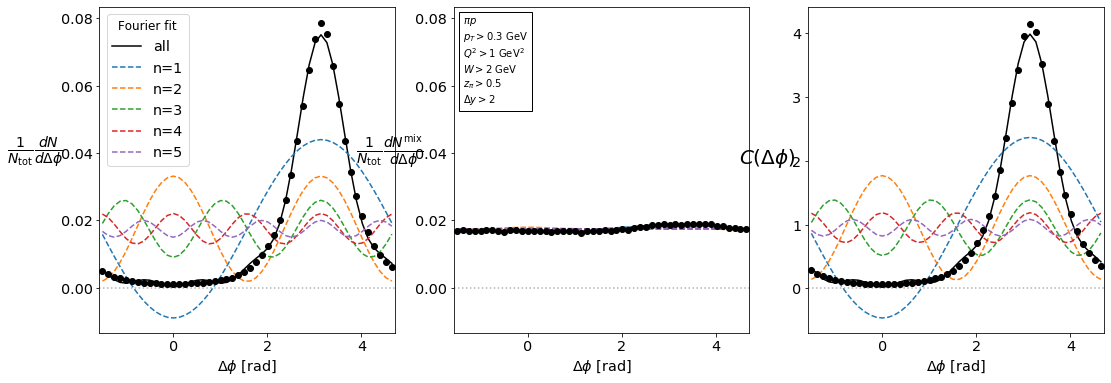

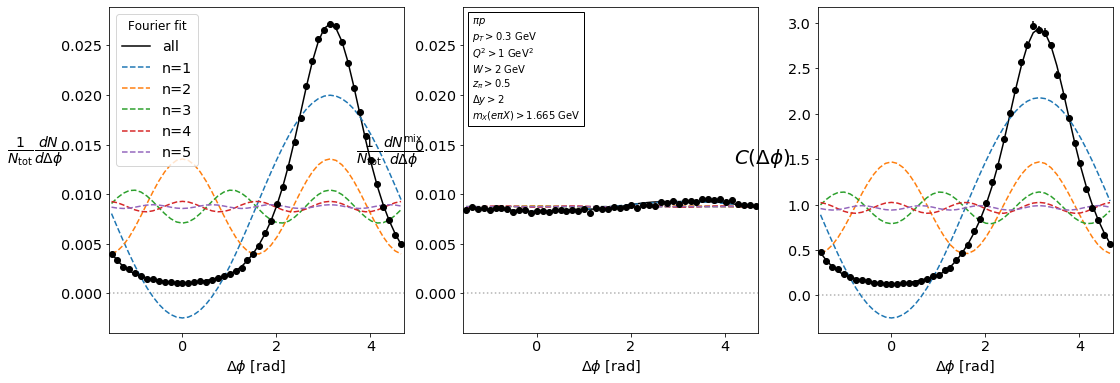

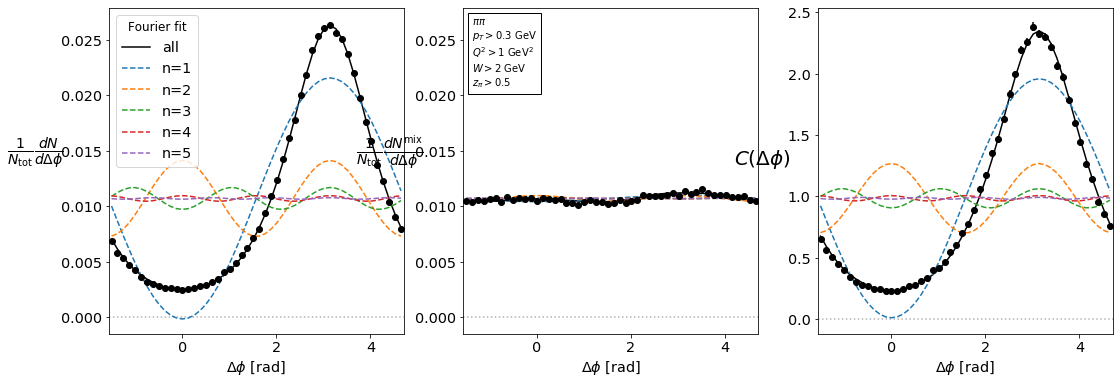

In [130]:
df = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + "and h2_pid == 2212")
fig,axs = azimuthalPlot_3(df,df_trig,n=5)
axs[1].add_artist(AnchoredText("$\pi p$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_\\pi>0.5$\n$\\Delta y>2$",loc='upper left'))
plt.show()
df = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + "and h2_pid == 2212 and mx_eh1x > 1.665")
fig,axs = azimuthalPlot_3(df,df_trig,n=5)
axs[1].add_artist(AnchoredText("$\pi p$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_\\pi>0.5$\n$\\Delta y>2$\n$m_X(e\\pi X)> 1.665$ GeV",loc='upper left'))
plt.show()

df = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + "and abs(h2_pid) == 211")
fig,axs = azimuthalPlot_3(df,df_trig,n=5)
axs[1].add_artist(AnchoredText("$\pi\pi$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_\\pi>0.5$",loc='upper left'))
plt.show()

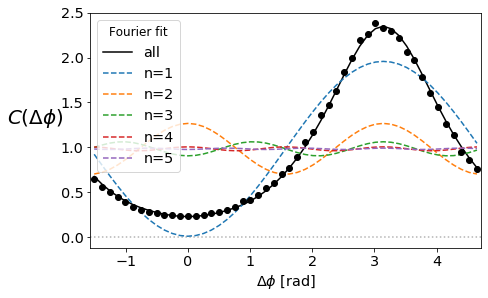

In [96]:
df = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + "and abs(h2_pid) == 211")
azimuthalPlot(df,df_trig,n=5)

<ipython-input-107-86d04697ff2b>:24: RuntimeWarning: invalid value encountered in true_divide
  dy = y/ym*np.hypot(dy/y, dym/ym)
<ipython-input-107-86d04697ff2b>:25: RuntimeWarning: invalid value encountered in true_divide
  y= y/ym


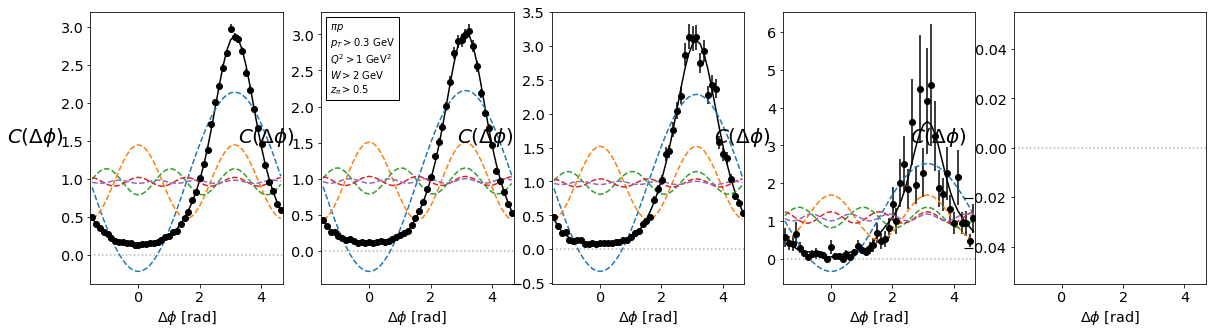

In [125]:
df = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + "and h2_pid == 2212 and mx_eh1x >1.665")

partitions = [0.5, 0.6,0.7,0.8,0.9,1.0]
fig,axs = plt.subplots(1,len(partitions)-1,figsize=(20,5))
for i, (mn,mx) in enumerate(zip(partitions[:-1],partitions[1:])):
    dfbin = df.query('h1_z>%s and h1_z<%s'%(mn,mx))
    plt.sca(axs[i])
    azimuthalPlot(dfbin,df_trig,n=5,show='corr',includeLegend=False)
axs[1].add_artist(AnchoredText("$\pi p$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_\\pi>0.5$",loc='upper left'))
plt.show()
            

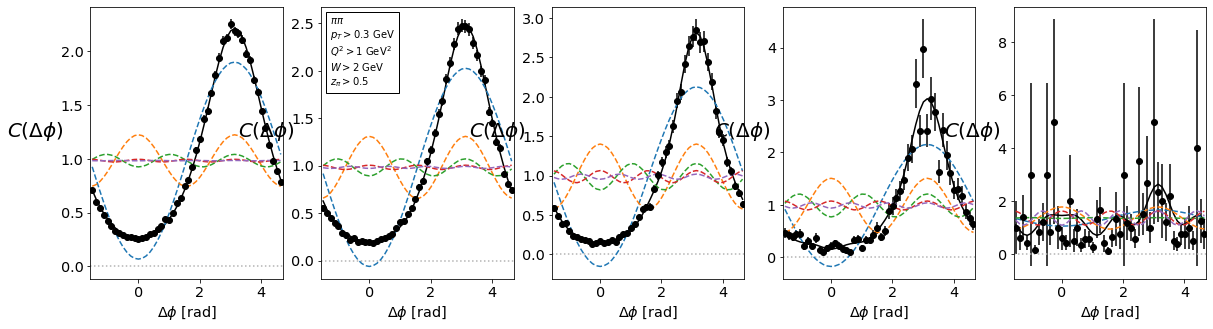

In [123]:
df = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + "and abs(h2_pid) == 211")

partitions = [0.5, 0.6,0.7,0.8,0.9,1.0]
fig,axs = plt.subplots(1,len(partitions)-1,figsize=(20,5))
for i, (mn,mx) in enumerate(zip(partitions[:-1],partitions[1:])):
    dfbin = df.query('h1_z>%s and h1_z<%s'%(mn,mx))
    plt.sca(axs[i])
    azimuthalPlot(dfbin,df_trig,n=5,show='corr',includeLegend=False)
axs[1].add_artist(AnchoredText("$\pi\pi$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_\\pi>0.5$",loc='upper left'))
plt.show()

<ipython-input-107-86d04697ff2b>:24: RuntimeWarning: invalid value encountered in true_divide
  dy = y/ym*np.hypot(dy/y, dym/ym)
<ipython-input-107-86d04697ff2b>:24: RuntimeWarning: divide by zero encountered in true_divide
  dy = y/ym*np.hypot(dy/y, dym/ym)
<ipython-input-107-86d04697ff2b>:25: RuntimeWarning: divide by zero encountered in true_divide
  y= y/ym
<ipython-input-107-86d04697ff2b>:37: RuntimeWarning: invalid value encountered in double_scalars
  b = [2*sum(y*np.cos(i*x))/len(x) for i in range(0,n+1)]


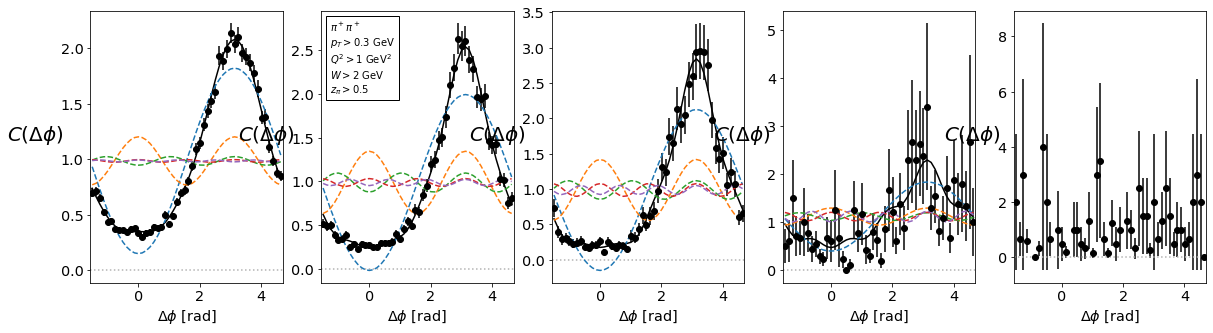

In [124]:
df = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + "and h2_pid == 211 and h1_pid == 211")

partitions = [0.5, 0.6,0.7,0.8,0.9,1.0]
fig,axs = plt.subplots(1,len(partitions)-1,figsize=(20,5))
for i, (mn,mx) in enumerate(zip(partitions[:-1],partitions[1:])):
    dfbin = df.query('h1_z>%s and h1_z<%s'%(mn,mx))
    plt.sca(axs[i])
    azimuthalPlot(dfbin,df_trig,n=5,show='corr',includeLegend=False)
axs[1].add_artist(AnchoredText("$\pi^+\pi^+$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_\\pi>0.5$",loc='upper left'))
plt.show()

(array([      0.,       0.,       0.,       0.,       0., 1672821.,
              0.,       0.,       0.,       0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

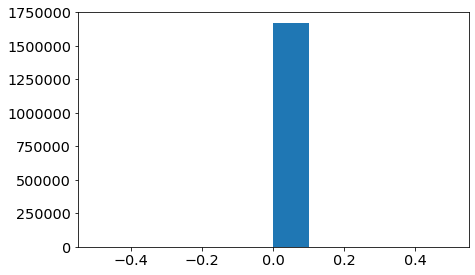